In [1]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

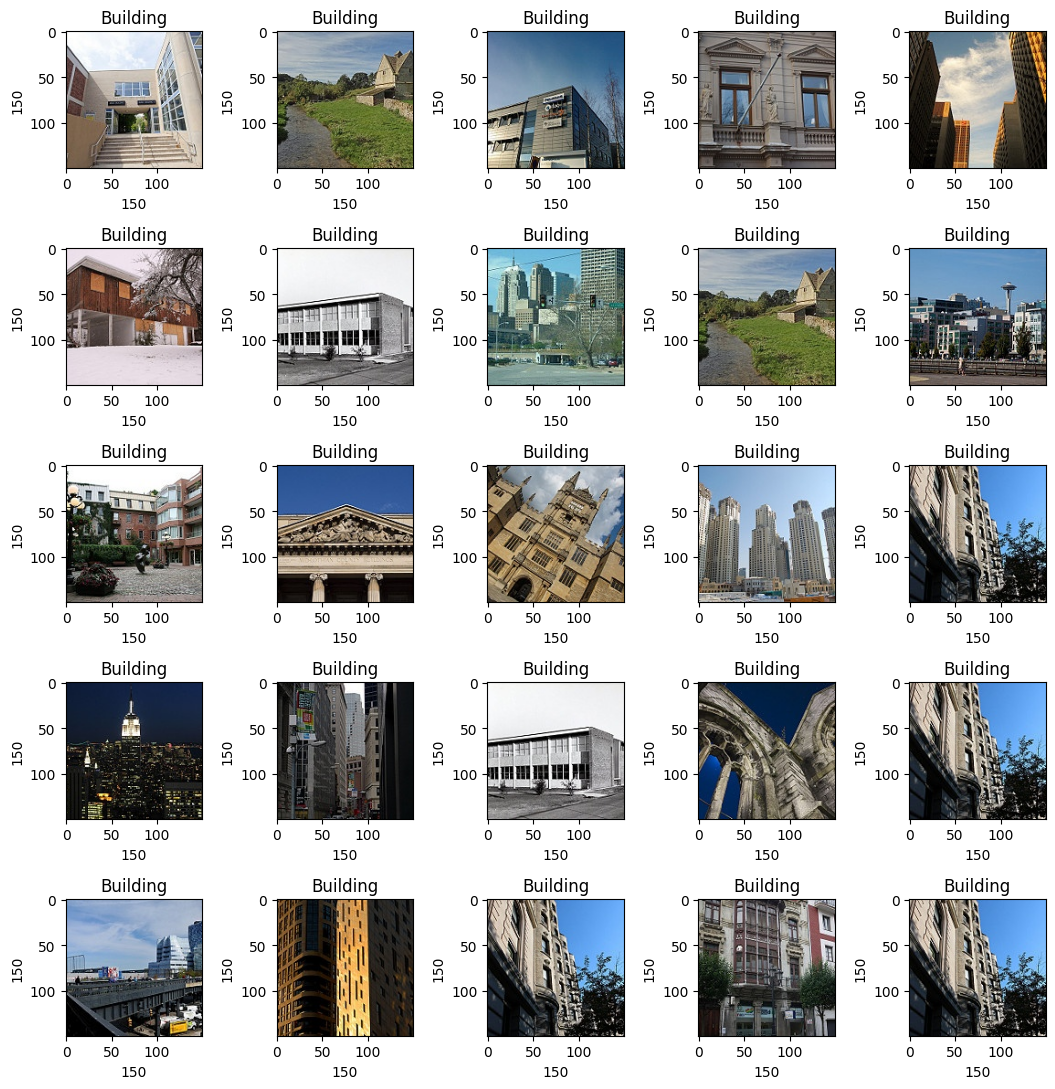

In [2]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = r"C:\Users\USER\Python Files\Data_intel\Intel Image Dataset\buildings"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('Building')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [3]:
# Setting root directory path and creating empty list
dir = r"C:\Users\USER\Python Files\Data_intel\Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [4]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [5]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

buildings    55
forest       55
glacier      55
mountain     55
sea          55
street       55
Name: count, dtype: int64

In [6]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

In [7]:
# Checking x data shape
np.array(image_list).shape

(330, 150, 150, 3)

In [8]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(330,)

In [9]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [10]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

In [11]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [12]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_7 (Bat  (None, 148, 148, 16)      64        
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 148, 148, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_8 (Bat  (None, 146, 146, 32)      128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 146, 146, 32)     

In [17]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [18]:
# Training the model
epochs = 40
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/40
2/2 [==============================] - 55s 15s/step - loss: 2.2403 - accuracy: 0.1991 - val_loss: 1.7656 - val_accuracy: 0.2642
Epoch 2/40
2/2 [==============================] - 24s 8s/step - loss: 1.4804 - accuracy: 0.3886 - val_loss: 1.7573 - val_accuracy: 0.3774
Epoch 3/40
2/2 [==============================] - 23s 8s/step - loss: 1.3504 - accuracy: 0.5024 - val_loss: 1.7582 - val_accuracy: 0.2453
Epoch 4/40
2/2 [==============================] - 22s 9s/step - loss: 1.2383 - accuracy: 0.5261 - val_loss: 1.7586 - val_accuracy: 0.2075
Epoch 5/40
2/2 [==============================] - 23s 8s/step - loss: 1.0932 - accuracy: 0.6256 - val_loss: 1.7674 - val_accuracy: 0.1509
Epoch 6/40
2/2 [==============================] - 22s 9s/step - loss: 1.0810 - accuracy: 0.6209 - val_loss: 1.7787 - val_accuracy: 0.1509
Epoch 7/40
2/2 [==============================] - 25s 9s/step - loss: 0.9628 - accuracy: 0.6682 - val_loss: 1.7903 - val_accuracy: 0.1509
Epoch 8/40
2/2 [=================

In [19]:
# Saving model
model.save(r"C:\Users\USER\Python Files\Data_intel\intel_image.h5")

C:\Users\USER\anaconda3\envs\DataFrame\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


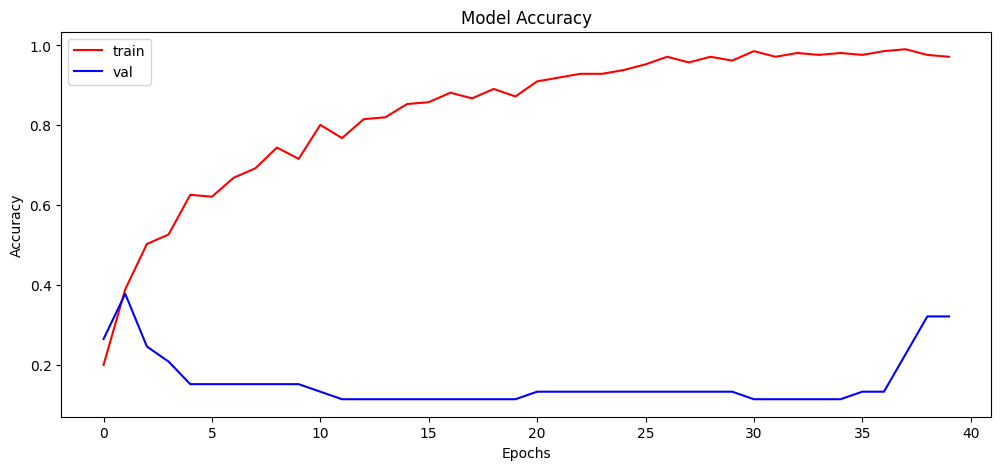

In [20]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

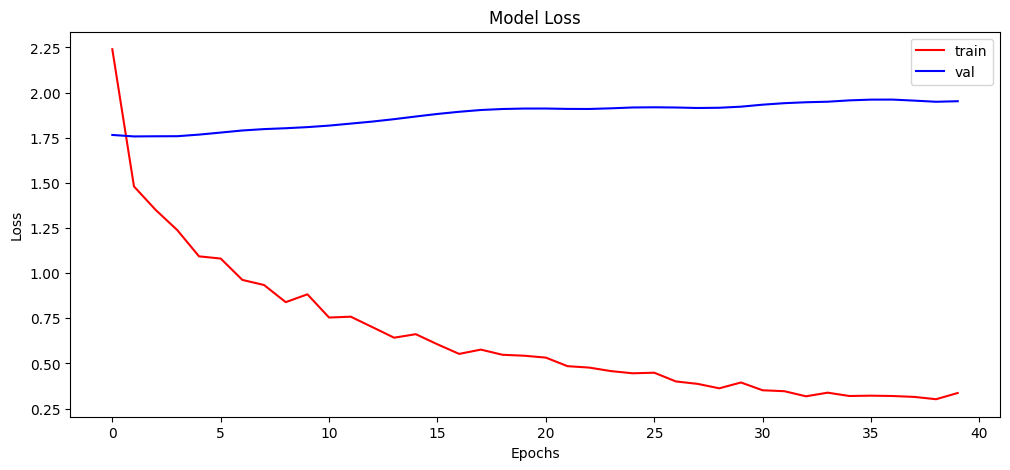

In [21]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [22]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

3/3 [==============================] - 1s 282ms/step - loss: 1.8771 - accuracy: 0.3788
Test Accuracy: 37.87878751754761


In [23]:
# Storing model predictions
y_pred = model.predict(x_test)

3/3 [==============================] - 2s 289ms/step


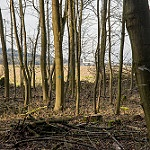

In [30]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [31]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[10])])
print("Predicted : ",labels[np.argmax(y_pred[10])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  forest
Predicted :  forest
